<a href="https://colab.research.google.com/github/udaylunawat/Machine-Learning-Assignments/blob/master/NN_from_scratch/NN_from_scratch.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Neural Network from scratch

## 1. Importing libraries

In [1]:
import random
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
import pickle

# 2. Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

### Task 1: Implementing backpropagation and Gradient checking


<pre>1. <b>Check this video for better understanding of the computational graphs and back propagation:</b> <a href='https://www.youtube.com/watch?v=i94OvYb6noo#t=1m33s'>https://www.youtube.com/watch?v=i94OvYb6noo</a>
</pre>

<pre>
2. <b>write two functions</b>

#you can modify the definition of this function according to your needs
<font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, ..., W[8] corresponds to w9 in graph.
        # write code to compute the value of L=(y-y')^2
        </font>
        return (L, any other variables which you might need to use for back propagation)
        <font color='grey'>
        # Hint: you can use dict type to store the required intermediate variables 
        </font>
</font>
</pre>

<pre>
# you can modify the definition of this function according to your needs
<font color='blue'>
def backward_propagation(L, Variables):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # Variables: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        </font>
        return dW
        <font color='grey'>
        # here dW can be a list, or dict or any other data type wich will have gradients of all the weights
        # Hint: you can use dict type to store the required variables 
        </font>
</font>
</pre>
3. <b> <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>Gradient checking</a></b>:<a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> 

<pre>we know that the derivative of any function is </pre>$$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$
<pre>
The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of gradient checking!

</pre>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}

to do this task you need to write a function 
<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):
    <font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    </font>
    approx_gradients = []
    for each wi weight value in W:
        <font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        </font>
        approx_gradients.append(approximation gradients of weight wi)
    <font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with      gradient_check formula
    </font>
    return gradient_check
</font>
NOTE: you can do sanity check by checking all the return values of gradient_checking(), they have to be zero. if not you have bug in your code
</pre>

# Forward Propagation
![FP](https://i.imgur.com/mM1N1bC.png)

In [2]:
class NeuralNetwork:
    '''
    This Neural Network was implemented from scratch to solve the above given task
    '''
    
    def __init__(self):
        np.random.seed(10) # for generating the same results
    
    
    def initialize_weights(self, n):
        """
        Initialize weights.

        Weight matrices will be initialized to random values from uniform normal
        distribution.


        Parameters
        ----------
        n : int
             Size of weight vector


        Returns
        ------- 
        W : array_like
            A (9 x 1) matrix of weights
        """
        
        W = np.array([np.random.rand() for i in range(n)])
#         W = np.array([random.uniform(-1,1) for i in range(n)])

        return W

    
    
    # Class documentation style acquired from
    # https://github.com/KirillShmilovich/MLP-Neural-Network-From-Scratch/blob/master/MLP.ipynb
    def sigmoid(self, x):
        """

        Compute the sigmoid of `x`, calculated element-wise
        sigmoid applied to `x` element-wise


        Parameters
        ----------
        x : float or array_like input


        Returns
        -------
        sigmoid(x) : float or array_like
        """
        return 1/(1+np.exp(-x))
    
    
    
    def forward_propagation(self, F, y, W):
        """
        Calculate loss, y_pred and intermediate variable dictionary


        Parameters
        ----------
        F : array_like input for input features
        y : array_like input for target labels
        W : array_like input for weights


        Returns
        -------
        y_pred : float prediction
        Loss : squared loss
        var_dict : dictionary for intermediate variables
        """

        q1 = W[0] * F[0]
        q2 = W[1] * F[1]
        q3 = q1 + q2
        q4 = q3 * q3
        q5 = W[5] + q4
        q6 = np.exp(q5)
        q7 = W[6] + q6
        q8 = np.tanh(q7)
        q9 = W[2] * F[2]
        q10 = W[3] * F[3]
        q11 = W[4] * F[4]
        q12 = np.sin(q9)
        q13 = q10 + q11
        q14 = q12 * q13
        q15 = W[7] + q14
        q16 = self.sigmoid(q15)
        q17 = W[8] * q16
        y_pred = q8 + q17
        Loss = (y - y_pred)**2
        var_dict = {
            'q1':q1,'q2':q2,'q3':q3,'q4':q4,'q5':q5,'q6':q6,'q7':q7,'q8':q8,'q9':q9,'q10':q10,'q11':q11,
            'q12':q12,'q13':q13,'q14':q14,'q15':q15,'q16':q16,'q17':q17
        }

        return y_pred, Loss, var_dict
    
    
    
    def backward_propagation(self, X, y, W, vd):
        """
        Calculating derivatives and storing frequently used derivatives using memoization


        Parameters
        ----------
        X : array_like input for input features
        y : array_like input for target labels
        W : array_like input for weights
        vd : dictionry with keys from q1 to q18


        Returns
        -------
        derivatives_list : list with derivatives of w1 to w9
        """

        y_pred = vd['q8'] + vd['q17']
        dL_dy = -2 * (y - y_pred)
        
        dL_q8 = -2 * (y - vd['q8'] - vd['q17'])
        dL_q17 = -2 * (y - vd['q8'] - vd['q17'])
        dq1 = X[0]
        dq2 = X[1]
        dq3 = 1
        dq4 = 2 * vd['q3']
        dq5 = 1
        dq6 = vd['q6']
        dq7 = 1
        dq8 = 1 - np.tanh(vd['q7'])**2
        dq9 = X[2]
        dq10 = X[3]
        dq11 = X[4]
        dq12 = np.cos(vd['q9'])
        dq13 = 1
        dq14_q12 = vd['q13']
        dq14_q13 = vd['q12']
        dq15 = 1
        dq16 = vd['q16']*(1 - vd['q16']) #doubtful
        dq17_w9 = vd['q16']
        dq17_q16 = W[8]


        dw1 = dq8*dq7*dq6*dq5*dq4*dq3*dq1
        dw2 = dq8*dq7*dq6*dq5*dq4*dq3*dq2
        dw3 = dq17_q16*dq16*dq15*dq14_q12*dq12*dq9
        dw4 = dq17_q16*dq16*dq15*dq14_q13*dq13*dq10
        dw5 = dq17_q16*dq16*dq15*dq14_q13*dq13*dq11
        dw6 = dq8*dq7*dq6*dq5
        dw7 = dq8*dq7
        dw8 = dq17_q16*dq16*dq15
        dw9 = dq17_w9


        grad = np.array([dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9]) * dL_dy
        # Multiplying dL_dy fails gradient check but results in correct vanilla SGD
        # When dL_dy is not multiplies gradient check succeeds

        return grad
    
    
    #Source -  https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9
    def gradient_check(self, X, y, W, e=1e-7):
        """
        This Method consists of approximating the gradient using a numerical approach. 
        If it is close to the calculated gradients, then backpropagation was implemented correctly!


        Parameters
        ----------
        X : array_like input for input features
        y : array_like input for target labels
        W : array_like input for weights
        e : epsilon, a really small value


        Returns
        -------
        Nothing
        """
        y_pred, Loss, var_dict = self.forward_propagation(X, y, W)
        grad = self.backward_propagation(X, y, W, var_dict)

        for i, weight in enumerate(W):
            w_plus, w_minus = W.copy(), W.copy()
            w_plus[i] = w_plus[i] + e
            w_minus[i] = w_minus[i] - e
            _, L_plus , _ = self.forward_propagation(X, y, w_plus)
            _, L_minus, _ = self.forward_propagation(X, y, w_minus)
            grad_approx = (L_plus - L_minus)/(2 * e)

            numerator = np.linalg.norm(grad[i] - grad_approx)
            denominator = np.linalg.norm(grad[i]) + np.linalg.norm(grad_approx)
            difference = numerator / denominator 

            if difference <= 1e-7:
                print('weight {0} is correct'.format(i+1))
            else:
                print('weight {0} is in-correct'.format(i+1), difference)  
    
    
    
    # http://cs231n.github.io/neural-networks-3/#sgd
    def Vanilla_sgd(self, x, y, W, epoch, learning_rate=0.0001):
        """
        While selecting data points at each step to calculate the derivatives,
        SGD randomly picks one data point from the whole data set at each iteration 
        to reduce the computations enormously.
        
        It is also common to sample a small number of data points instead of just one point at 
        each step and that is called “mini-batch” gradient descent. 
        Mini-batch tries to strike a balance between the goodness of gradient descent and speed of SGD.
        
        This vanilla_sgd is a single point sgd.


        Parameters
        ----------
        X : array_like input for input features
        y : array_like input for target labels
        W : array_like input for weights
        epoch : no. of epochs
        learning_rate : step size at each iteration while moving toward a minimum of a loss function


        Returns
        -------
        W : updated weight vector
        losses : list of loss at each epoch
        """
        losses = []
        for i in range(epoch):
            w = W
            epoch_y_pred=[]
            for j in range(len(x)):
                y_pred, loss, my_dict = self.forward_propagation(x[j], y[j], w)
                grad = self.backward_propagation(x[j], y[j], w, my_dict)

                #Updating weights with help of gradients
                for k in range(len(w)):
                    w[k] += - learning_rate * grad[k]

                epoch_y_pred.append(y_pred)

            losses.append(mse(y, epoch_y_pred))  
            
        return W, losses
    
    # http://cs231n.github.io/neural-networks-3/#sgd
    # https://deepnotes.io/sgd-momentum-adaptive
    def Momentum(self, x, y, W, epoch, learning_rate=0.0001):
        """
        Momentum update is another approach that almost always 
        enjoys better converge rates on deep networks.


        Parameters
        ----------
        X : array_like input for input features
        y : array_like input for target labels
        W : array_like input for weights
        epoch : no. of epochs
        learning_rate : step size at each iteration while moving toward a minimum of a loss function


        Returns
        -------
        W : updated weight vector
        losses : list of loss at each epoch
        """
        losses = []
        
        # Variables for momentum
        mu = 0.9 # friction for momentum
        v = np.zeros(9)
        
        for i in range(epoch):
            w = W
            epoch_y_pred=[]
            for j in range(len(x)):
                y_pred, loss, my_dict = self.forward_propagation(x[j], y[j], w)
                grad = self.backward_propagation(x[j], y[j], w, my_dict)

                #Updating weights with help of gradients
                for k in range(len(w)):
                    # Momentum update
                    v[k] = mu * v[k] - learning_rate * grad[k]  # integrate velocity
                    w[k] += v[k] # integrate position

                epoch_y_pred.append(y_pred)

            losses.append(mse(y, epoch_y_pred))  
            
        return W, losses
    
    
    # http://cs231n.github.io/neural-networks-3/#ada
    # https://deepnotes.io/sgd-momentum-adaptive
    def Adam(self, x, y, W, epoch, learning_rate=0.0001):
        
        """
        Adam is a recently proposed update that looks a bit like 
        RMSProp with momentum. 

        In practice Adam is currently recommended as the default algorithm to use, 
        and often works slightly better than RMSProp. 

        However, it is often also worth trying SGD+Nesterov Momentum as an alternative. 
        The full Adam update also includes a bias correction mechanism, 
        which compensates for the fact that in the first few time steps the vectors m,v are 
        both initialized and therefore biased at zero, before they fully “warm up”. 


        Parameters
        ----------
        X : array_like input for input features
        y : array_like input for target labels
        W : array_like input for weights
        epoch : no. of epochs
        learning_rate : step size at each iteration while moving toward a minimum of a loss function


        Returns
        -------
        W : updated weight vector
        losses : list of loss at each epoch
        """
        losses = []
        
        # variables for Adam
        eps = 1e-8
        beta1 = 0.9
        beta2 = 0.999
        
        v = np.zeros(9)
        m = np.zeros(9)
        
        for i in range(epoch):
            w = W
            epoch_y_pred=[]
            for j in range(len(x)):
                y_pred, loss, my_dict = self.forward_propagation(x[j], y[j], w)
                grad = self.backward_propagation(x[j], y[j], w, my_dict)

                #Updating weights with help of gradients
                for k in range(len(w)):
                    m[k] = beta1 * m[k] + (1-beta1) * grad[k]
                    v[k] = beta2 * v[k] + (1-beta2) * grad[k]**2
                    w[k] += - learning_rate * m[k] / (np.sqrt(v[k]) + eps)

                epoch_y_pred.append(y_pred)

            losses.append(mse(y, epoch_y_pred))  

        return W, losses


In [3]:
# def parameter_update(update, learning_rate, grad):
#     for k in range(len(w)):
#         if update == "vanilla":
#             w[k] += - learning_rate * grad[k]

#         elif update == "momentum":
#             # Momentum update
#             self.v[k] = mu * self.v[k] - learning_rate * grad[k]  # integrate velocity
#             w[k] += self.v[k] # integrate position

#     return w, v

In [4]:
# if __name__ == '__main__':
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

print("Shape of data:",data.shape)
X = data[:, :5]
y = data[:, -1]
print("X Shape",X.shape,"\ny shape", y.shape)

Shape of data: (506, 6)
X Shape (506, 5) 
y shape (506,)


In [5]:
# Gradient checking
model = NeuralNetwork()
W = model.initialize_weights(9)
model.gradient_check(X[0], y[0], W)

weight 1 is correct
weight 2 is correct
weight 3 is correct
weight 4 is correct
weight 5 is correct
weight 6 is correct
weight 7 is correct
weight 8 is correct
weight 9 is correct


# Weight initialization mistake:-
- Generating weights by using random.uniform causes gradient check to fail a lot of times.

<code>W = np.array([random.uniform(-1,1) for i in range(n)])</code>


- The gradient-checks are inconsistent and sometimes incorrect
- They produce correct results on some re-runs
- This is because gradient-check depends upon weight initialization
- But doing the same using random.rand works well

<code>W = np.array([np.random.rand() for i in range(n)])</code>

# Gradient check mistake
- Gradient check also failed because of a mistake I made.
- I used y_preds instead of Loss to calculate grad_approx.
- But that still resulted in the Optimizers working properly, the question is how?

### Task 2: Optimizers

1. As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
2. check this video and blog: https://www.youtube.com/watch?v=gYpoJMlgyXA,  http://cs231n.github.io/neural-networks-3/
3. use the same computational graph that was mentioned above to do this task
4. initilze the 9 weights from normal distribution with mean=0 and std=0.01

5. 

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

6.

<pre>
<b>task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights
<b>task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights
<b>task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights
</pre>



<img style="float: left;" src="http://cs231n.github.io/assets/nn3/opt1.gif" width="500" height="500">

<img style="float: left;" src="http://cs231n.github.io/assets/nn3/opt2.gif" width="500" height="500">

In [6]:
epochs = 80
W = model.initialize_weights(9)
W, losses = model.Vanilla_sgd(X, y, W, epochs)

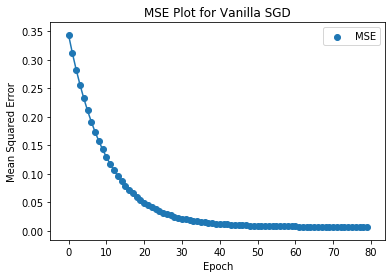

In [7]:
plt.plot(range(epochs), losses)
plt.scatter(range(epochs), losses, label='MSE')
plt.title("MSE Plot for Vanilla SGD")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

- SGD took around 50 epochs to converge

In [8]:
epochs = 20
W = model.initialize_weights(9)
W, losses = model.Momentum(X, y, W, epochs)

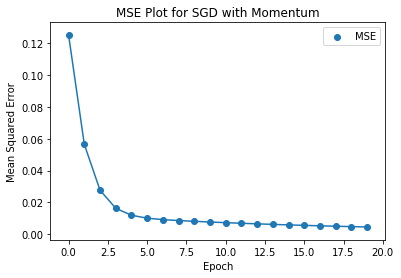

In [9]:
plt.plot(range(epochs), losses)
plt.scatter(range(epochs), losses, label='MSE')
plt.title("MSE Plot for SGD with Momentum")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

- Here we can clearly see the advantage of momentum is that it makes very small change to SGD but provides a big boost to speed of learning.

In [10]:
epochs = 20
model = NeuralNetwork()
W = model.initialize_weights(9)
W, losses = model.Adam(X, y, W, epochs)

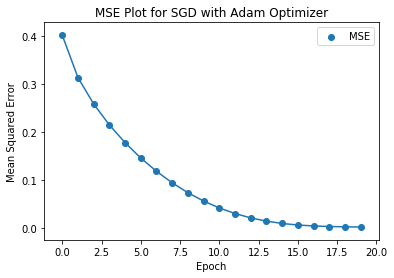

In [11]:
plt.plot(range(epochs), losses)
plt.scatter(range(epochs), losses, label='MSE')
plt.title("MSE Plot for SGD with Adam Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

- Adam [(original paper)](https://arxiv.org/abs/1412.6980) is a recently proposed and currently state of the art first order optimization algorithm.
- Another thing to note is that Adam includes bias correction mechanism, which compensates for first few iterations when both cache and velocity are biased at zero as they are initialized to zero.
- Using large models and datasets, we demonstrate Adam can efficiently solve practical deep learning problems.
- [Sebastian Ruder](http://sebastianruder.com/) developed a comprehensive review of modern gradient descent optimization algorithms titled [“An overview of gradient descent optimization algorithms”](https://arxiv.org/abs/1609.04747)published first as a [blog post](http://sebastianruder.com/optimizing-gradient-descent/index.html), then a technical report in 2016.